# Stock Prices Prediction Using Machine Learning

* Predicting how the stock market will perform is one of the most difficult things to do. 
There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.



* We will implement machine learning algorithms to predict the future stock price of GOOGLE (GOOG) - NASDAQ listed and JP Morgan Chase (JPM) - NYSE listed stocks, starting with linear regression, and then move on to the advanced techniques like Auto ARIMA and LSTM.

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import modules
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
# Data file paths
path = os.path.join('','data/')

# Market Index data files
nyse_file = path + 'NYSE.csv'
nasdaq_file = path + 'Nasdaq.csv'

# Stock data files
jpm_stock = path + 'JPM_stock.csv'
jpm_div = path + 'JPM_div.csv'
jpm_split = path + 'JPM_split.csv'
google_stock = path + 'GOOG_stock.csv'
google_div = path + 'GOOG_split.csv'

In [3]:
# Load market index files
nyse_df = pd.read_csv(nyse_file, parse_dates=[0])
nasdaq_df = pd.read_csv(nasdaq_file, parse_dates=[0])

In [4]:
# Laod stock fils
jpm_df = pd.read_csv(jpm_stock, parse_dates=[0])
google_df = pd.read_csv(google_stock, parse_dates=[0])

In [5]:
# Check df data types
nyse_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [6]:
# Sample data
nyse_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
13814,2020-11-16,13946.190430,13985.509766,13879.179688,13982.190430,13982.190430,5.281980e+09
13815,2020-11-17,13880.809570,13989.339844,13818.759766,13949.099609,13949.099609,4.799570e+09
13816,2020-11-18,13986.410156,14004.610352,13808.370117,13808.650391,13808.650391,5.274450e+09
13817,2020-11-19,13765.519531,13871.259766,13714.269531,13863.230469,13863.230469,4.347200e+09
13818,2020-11-20,13853.120117,13883.450195,13810.240234,13827.000000,13827.000000,4.218970e+09


In [7]:
# Review min, max date and date format for each Market Index
print("NYSE data date range:",nyse_df.Date.min(),nyse_df.Date.max())
print("NASDAQ data date range:",nasdaq_df.Date.min(),nasdaq_df.Date.max())

NYSE data date range: 1965-12-31 00:00:00 2020-11-20 00:00:00
NASDAQ data date range: 1971-02-05 00:00:00 2020-11-20 00:00:00


In [8]:
# Review min, max date and date format for selected stocks
print("JPM stock data date range:",jpm_df.Date.min(),jpm_df.Date.max())
print("GOOGLE stock data date range:",google_df.Date.min(),google_df.Date.max())

JPM stock data date range: 1980-03-17 00:00:00 2020-11-20 00:00:00
GOOGLE stock data date range: 2004-08-19 00:00:00 2020-11-20 00:00:00


In [9]:
# Get start date - max of min date for market index and stock
start_date = np.max([nyse_df.Date.min(),nasdaq_df.Date.min(),jpm_df.Date.min(),google_df.Date.min()])
start_date

Timestamp('2004-08-19 00:00:00')

In [10]:
# Looking at the Market Index and selected stocks, we will need to select min data as '08/19/2004' 

In [11]:
# Create date filter
nyse_cond = nyse_df['Date'] >= start_date
nasdaq_cond = nasdaq_df['Date'] >= start_date
jpm_cond = jpm_df['Date'] >= start_date
google_cond = google_df['Date'] >= start_date

In [12]:
# Filter date for all data sets so we have same start date and end date
nyse_df= nyse_df[nyse_cond]
nasdaq_df= nasdaq_df[nasdaq_cond]
jpm_df= jpm_df[jpm_cond]
google_df= google_df[google_cond]

In [13]:
# Sample data for JPM
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


#### Overiew of the data columns

* There are multiple columns in the dataset – Date, Open, High, Low, close and Volume.

* The Open and Close represents the starting and ending trade price on a particular day.

* High and Low represents the maximum and minimum stock price for the day.

* Volume is the number of stocks bought or sold on a particular day.

In [14]:
# Lets verify is data has any null values and record count in all df's
nyse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 9724 to 13818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 255.9 KB


In [15]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 8466 to 12560
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 255.9 KB


In [16]:
jpm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 6166 to 10260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 255.9 KB


In [17]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 255.9 KB


All data files have 4095 rows with no null values.

In [18]:
# Now we know all df's have date column and same record count i.e. 2620. Let's change date format for all df's
nyse_df['Date']= pd.to_datetime(nyse_df.Date,format='%Y-%m-%d')
nasdaq_df['Date']= pd.to_datetime(nasdaq_df.Date,format='%Y-%m-%d')
jpm_df['Date']= pd.to_datetime(jpm_df.Date,format='%Y-%m-%d')
google_df['Date']= pd.to_datetime(google_df.Date,format='%Y-%m-%d')

# Let's set Date as index column 
nyse_df.index = nyse_df['Date']
nasdaq_df.index = nasdaq_df['Date']
jpm_df.index = jpm_df['Date']
google_df.index = google_df['Date']

In [19]:
# Verify Sample result - as all df's have same columns, we dont need to check all df's
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2004-08-19,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
2004-08-20,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
2004-08-23,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


[]

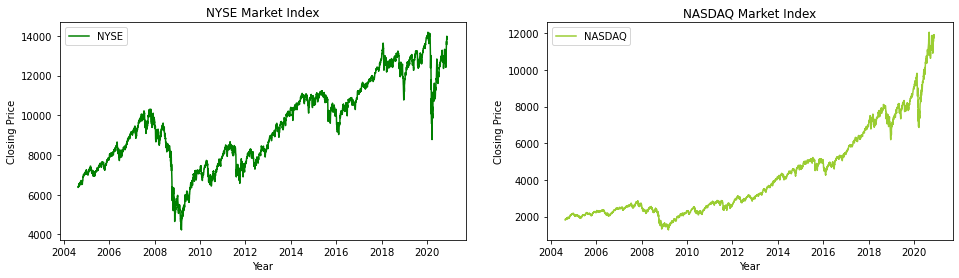

In [20]:
# Plot closing price to visualize the trend 
fig = plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.plot(nyse_df['Date'], nyse_df['Close'], c='green')

# Define legend and axis labels    
plt.legend(['NYSE'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NYSE Market Index')

plt.subplot(1, 2, 2)
plt.plot(nasdaq_df['Date'], nasdaq_df['Close'], c='yellowgreen')

# Define legend and axis labels    
plt.legend(['NASDAQ'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NASDAQ Market Index')

# Show chart
plt.plot()

[]

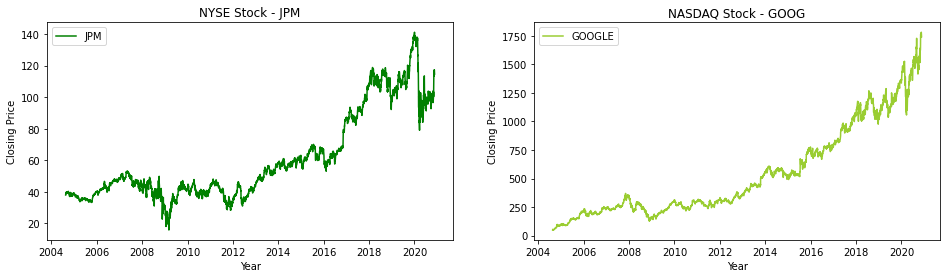

In [21]:
# Plot closing price to visualize the trend 
fig = plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.plot(jpm_df['Date'], jpm_df['Close'], c='green')

# Define legend and axis labels    
plt.legend(['JPM'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NYSE Stock - JPM')

plt.subplot(1, 2, 2)
plt.plot(google_df['Date'], google_df['Close'], c='yellowgreen')

# Define legend and axis labels    
plt.legend(['GOOGLE'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NASDAQ Stock - GOOG')

# Show chart
plt.plot()